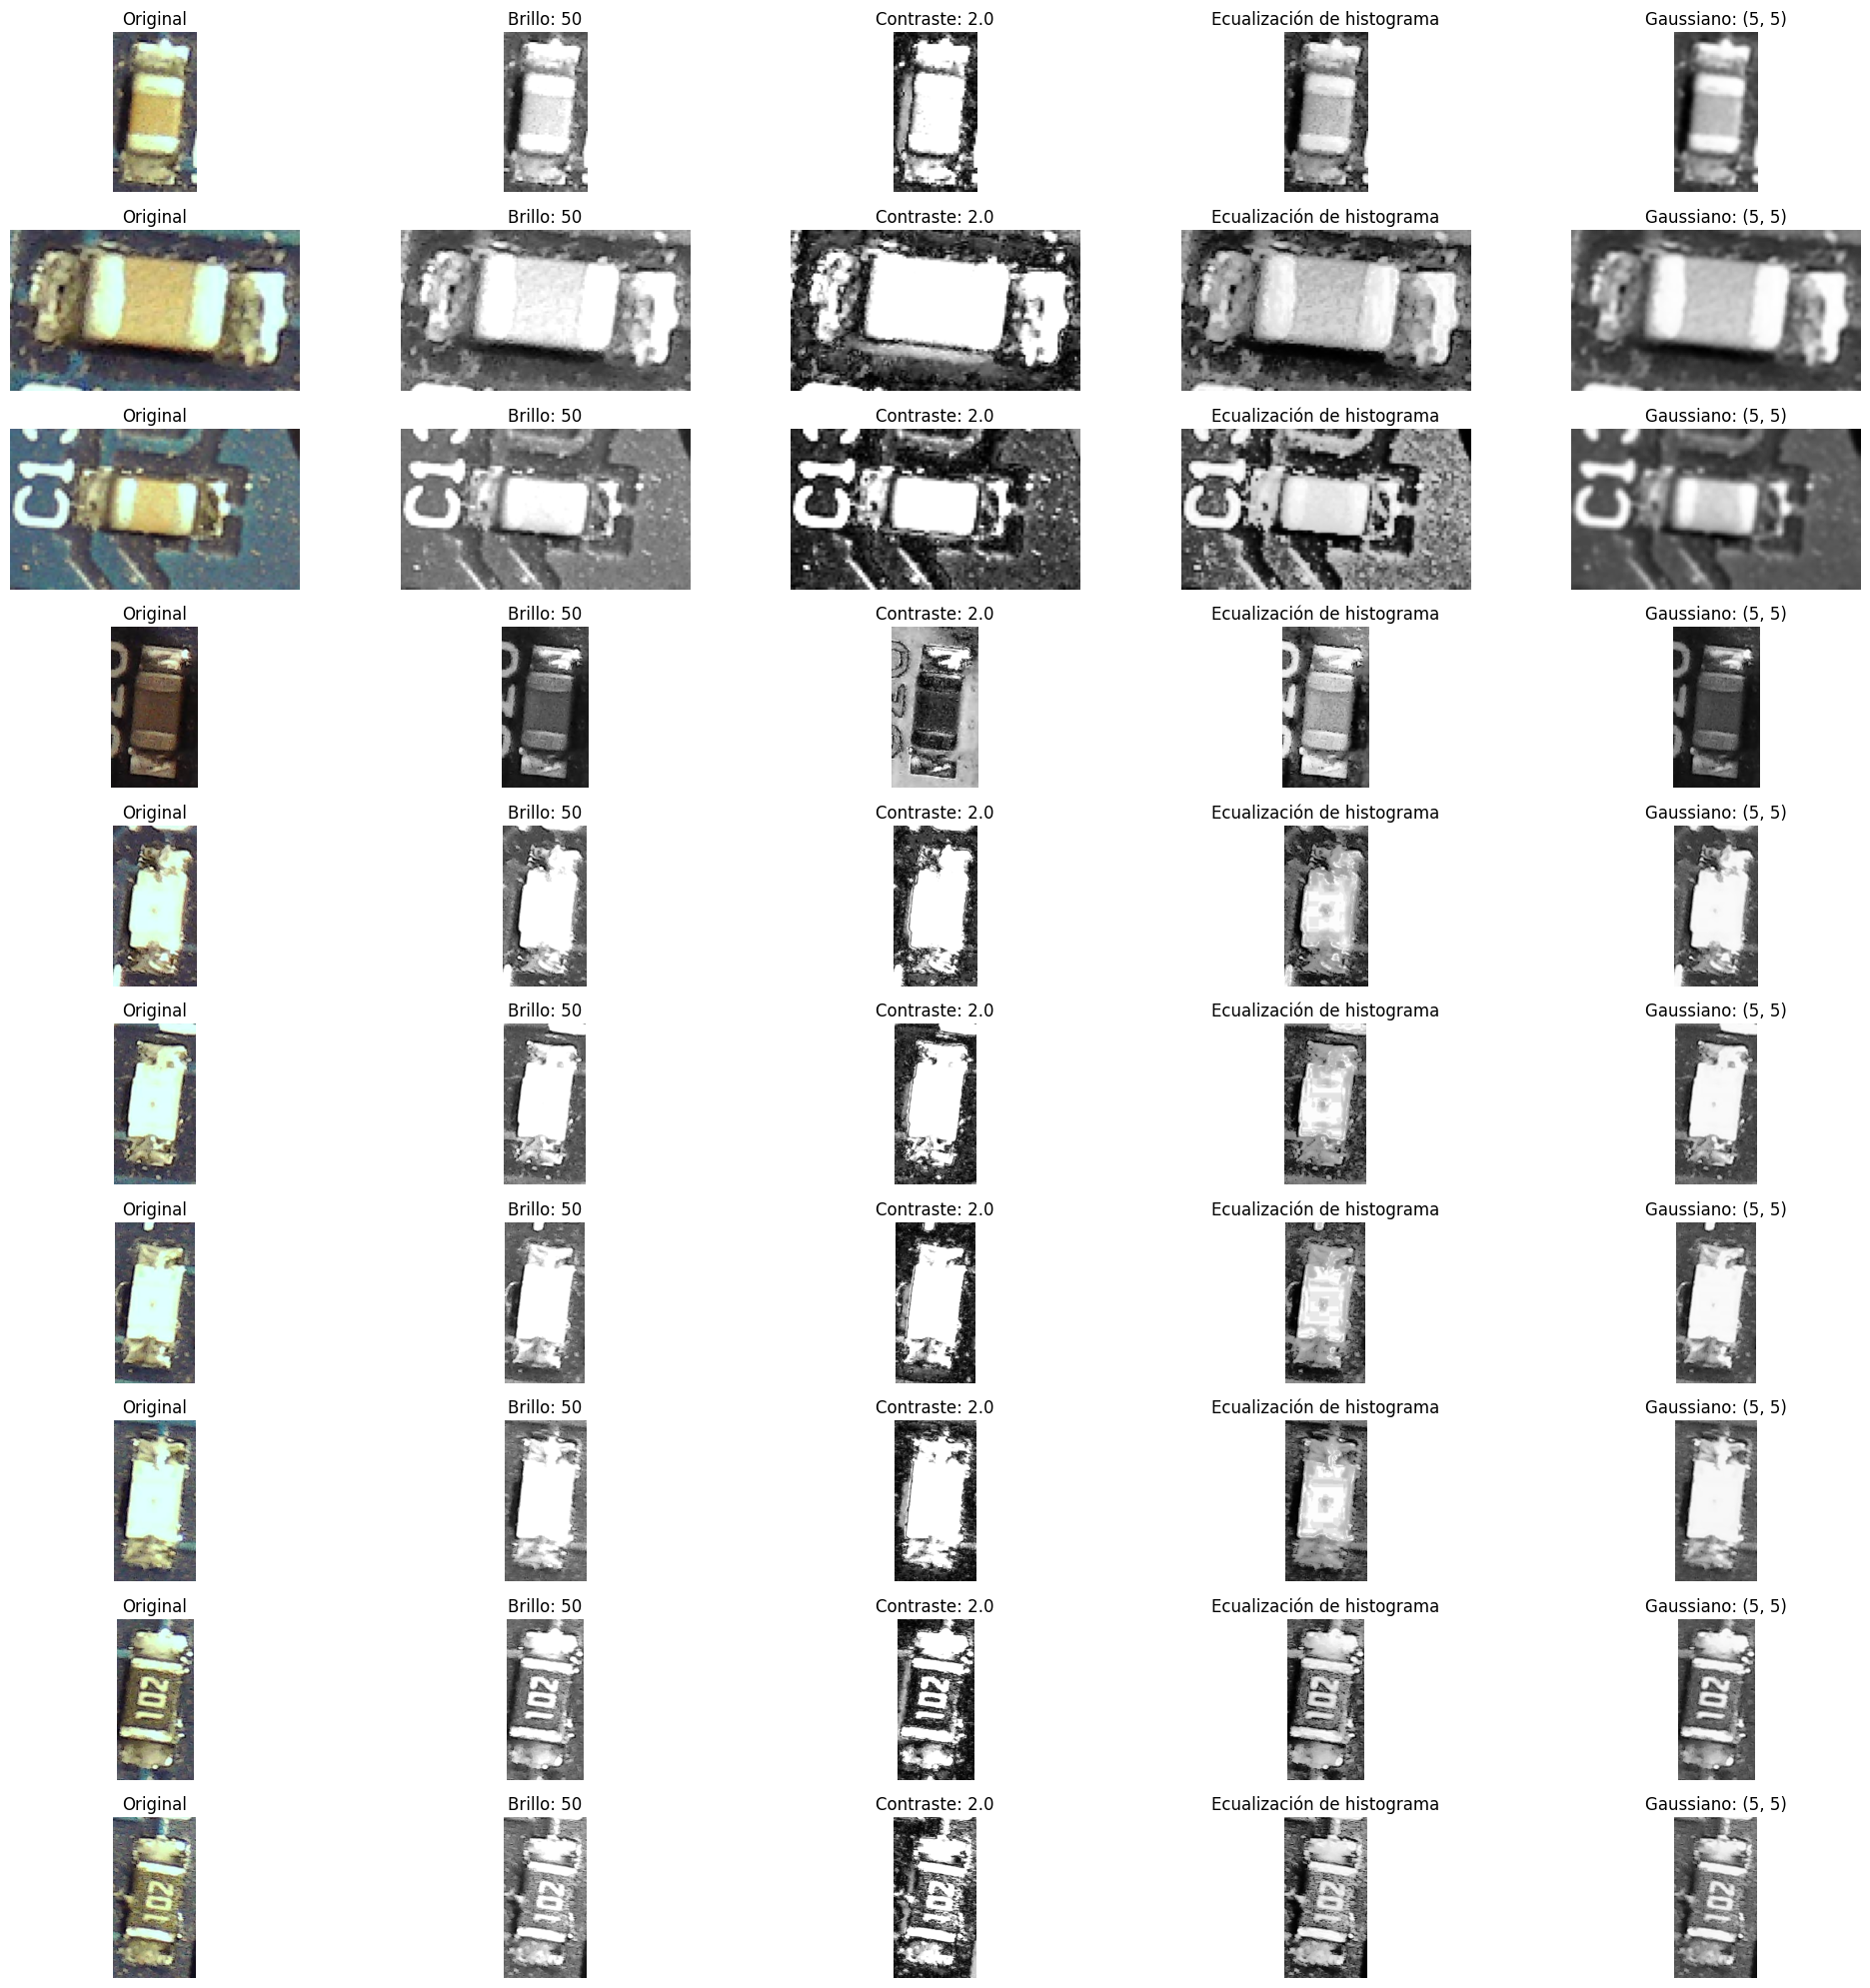

In [26]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

def apply_filters(image, method):
    """
    Apply different image processing techniques to enhance images.

    Args:
        image (numpy array): The input image.
        method (str): The filtering method to use. Can be 'brillo', 'contraste', 'histograma', or 'ruido'.

    Returns:
        processed (numpy array): The processed image.
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    if method == 'brillo':
        processed = cv2.convertScaleAbs(gray, alpha=1.0, beta=50)  # Aumenta brillo
        title = "Brillo: 50"
    elif method == 'contraste':
        processed = cv2.convertScaleAbs(gray, alpha=3, beta=-255)  # Aumenta contraste
        title = "Contraste: 2.0"
    elif method == 'histograma':
        processed = cv2.equalizeHist(gray)  # Ecualización de histograma
        title = "Ecualización de histograma"
    elif method == 'ruido':
        processed = cv2.GaussianBlur(gray, (3, 3), 0)  # Eliminación de ruido con filtro gaussiano
        title = "Gaussiano: (5, 5)"
    else:
        processed = gray  # Si no se reconoce el método, se devuelve la imagen en escala de grises
        title = "Original"
    
    return processed, title

# Especificar las rutas de las carpetas
folder_path = r'C:\Users\hgera\Downloads\DetectarComponentes'

# Obtener la lista de imágenes en la carpeta
image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpeg') or f.endswith('.png')]

# Crear una lista de métodos de filtrado
methods = ['brillo', 'contraste', 'histograma', 'ruido']

# Mostrar imágenes originales vs procesadas
plt.figure(figsize=(20, 20))

# Iterar sobre las primeras 10 imágenes
for i in range(min(10, len(image_files))):
    image_file = image_files[i]
    image = cv2.imread(os.path.join(folder_path, image_file))
    if image is None:
        print(f"Error: No se pudo cargar la imagen {image_file}")
        continue
    
    # Mostrar imagen original
    plt.subplot(10, 5, i * 5 + 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original')
    plt.axis('off')
    
    # Aplicar filtros y mostrar resultados
    for j, method in enumerate(methods):
        processed_image, title = apply_filters(image, method)
        plt.subplot(10, 5, i * 5 + j + 2)
        plt.imshow(processed_image, cmap='gray')
        plt.title(title)
        plt.axis('off')

plt.tight_layout()
plt.show()




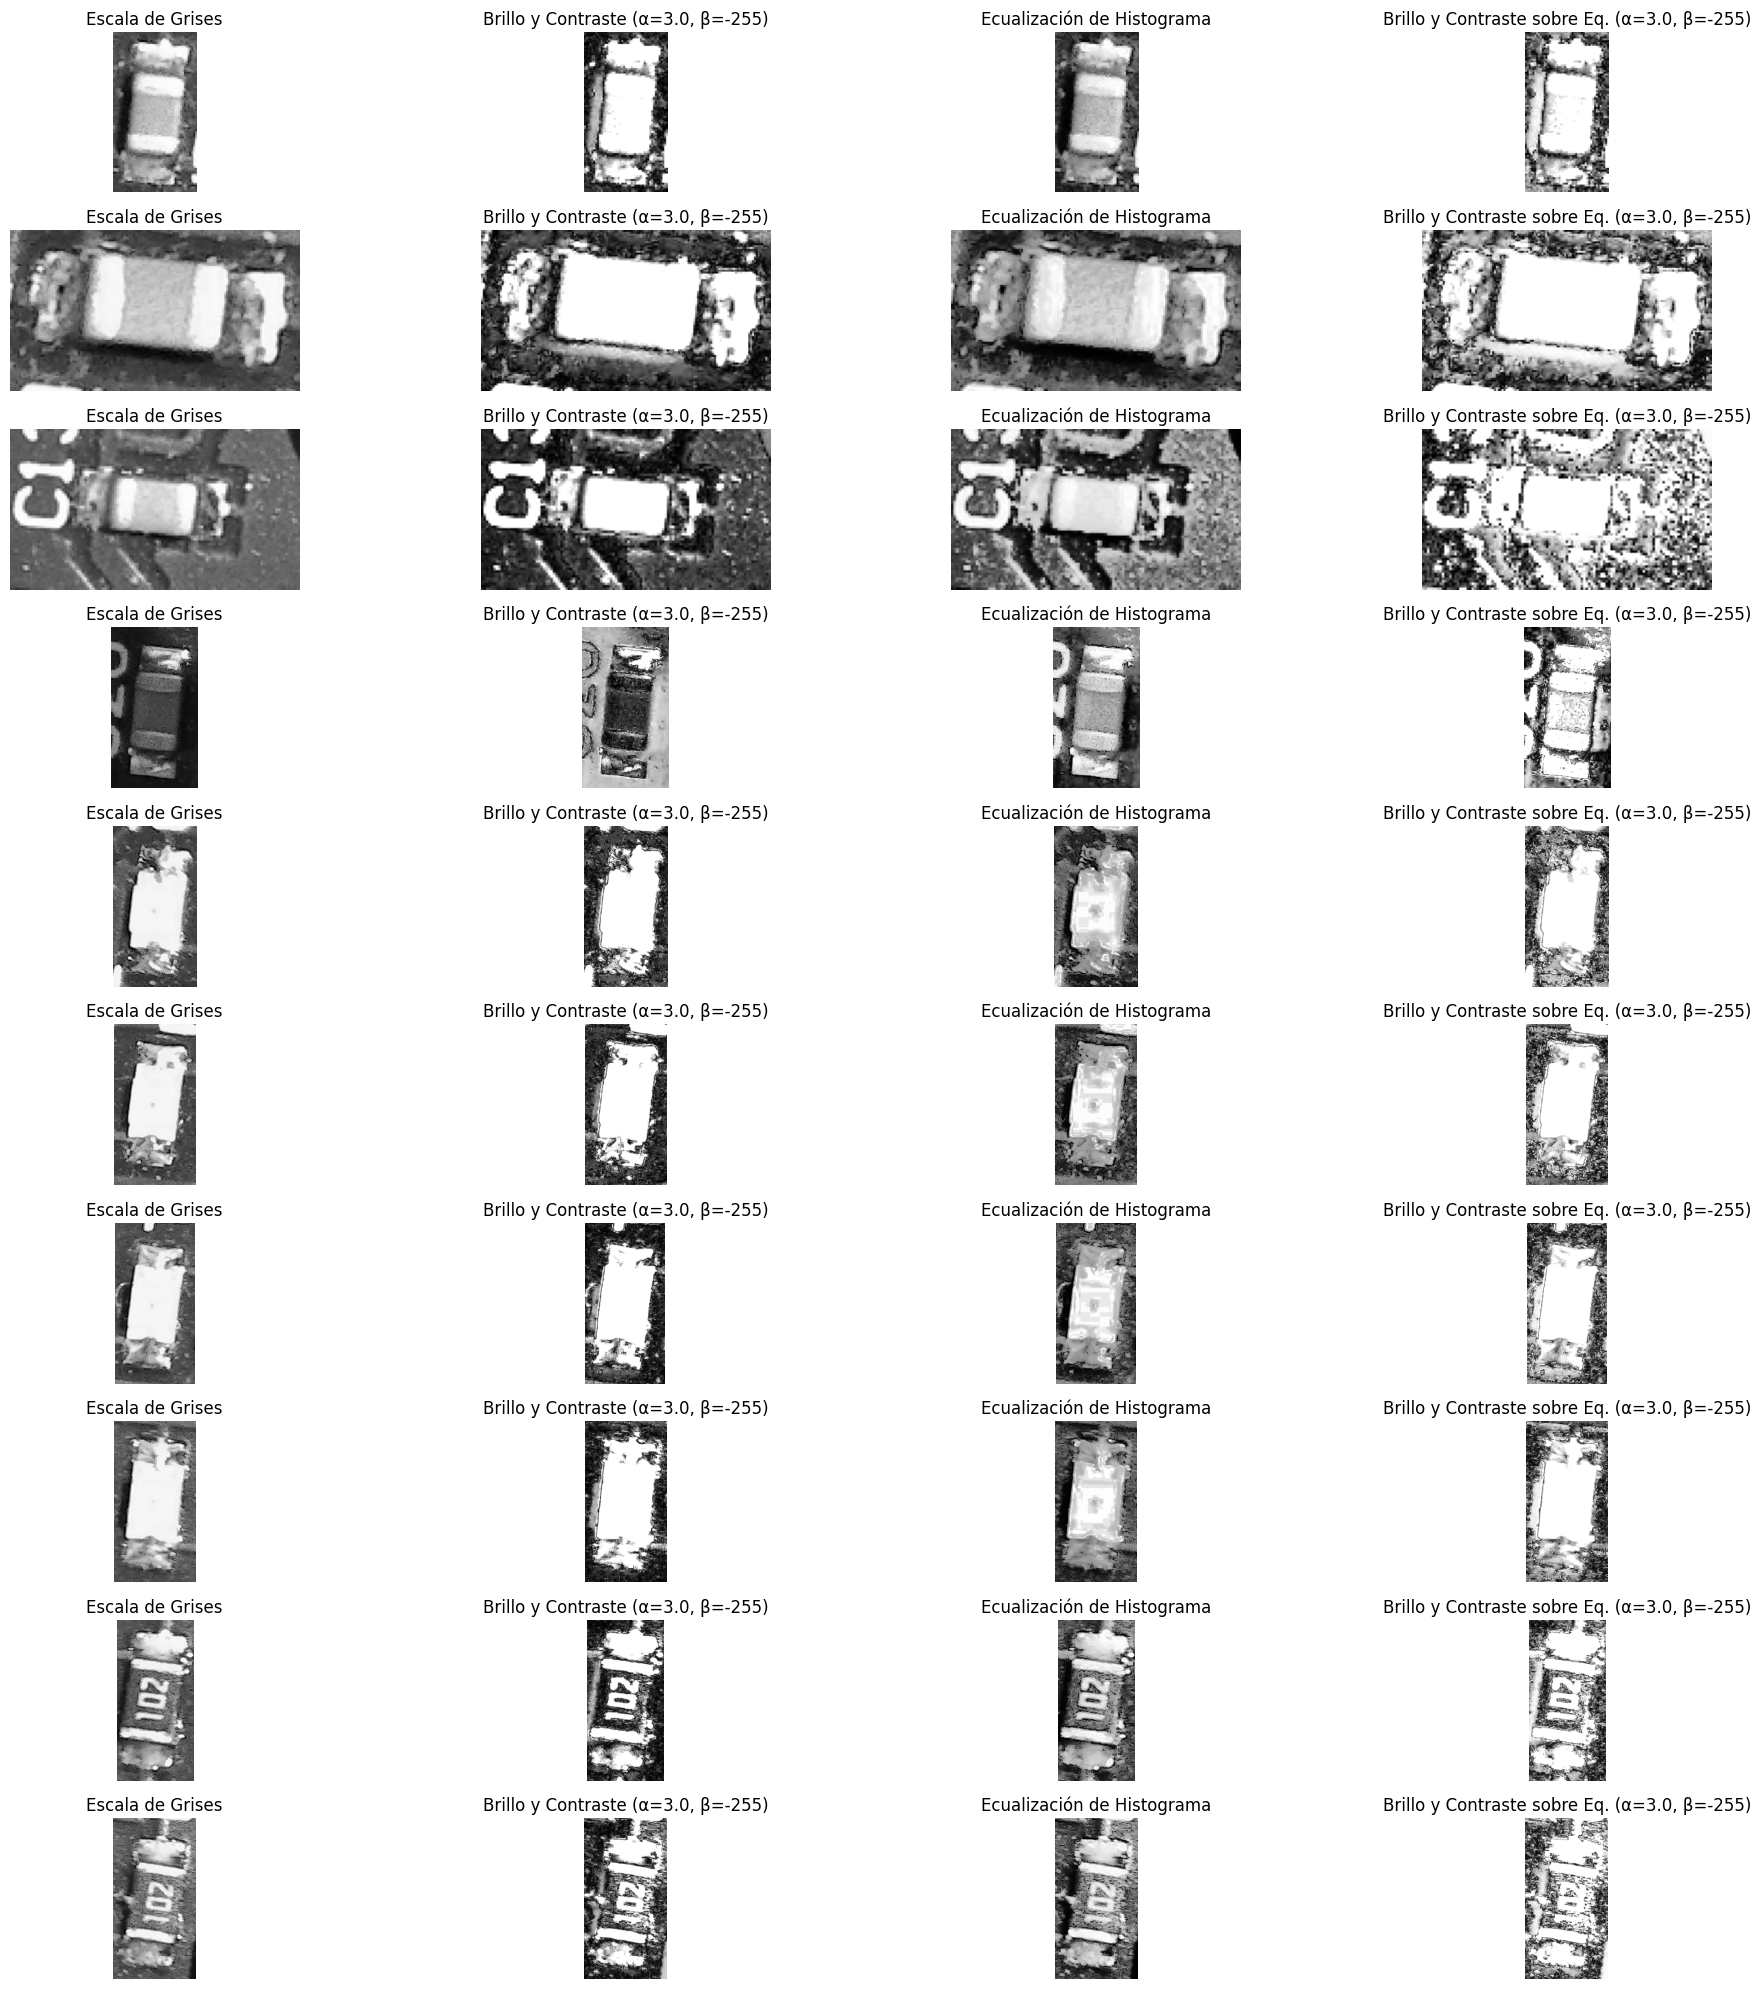

In [32]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def apply_brillo_contraste(image, alpha=1.0, beta=50):
    """
    Aplica una modificación de brillo y contraste a la imagen.
    """
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

def apply_histogram_equalization(image):
    """
    Aplica la ecualización de histograma a la imagen en escala de grises.
    """
    return cv2.equalizeHist(image)

# Especificar las rutas de las carpetas
folder_path = r'C:\Users\hgera\Downloads\DetectarComponentes'

# Obtener la lista de imágenes en la carpeta
image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpeg') or f.endswith('.png')]

# Parámetros de brillo y contraste
alpha = 3.0  # Contraste
beta = -255    # Brillo

# Mostrar imágenes originales vs procesadas
plt.figure(figsize=(20, 20))

# Iterar sobre las primeras 10 imágenes
for i in range(min(10, len(image_files))):
    image_file = image_files[i]
    image = cv2.imread(os.path.join(folder_path, image_file))
    if image is None:
        print(f"Error: No se pudo cargar la imagen {image_file}")
        continue
    
    # Convertir la imagen a escala de grises
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Modificar brillo y contraste sobre la imagen original
    image_brightness_contrast = apply_brillo_contraste(gray_image, alpha=alpha, beta=beta)
    
    # Aplicar ecualización de histograma
    image_hist_eq = apply_histogram_equalization(gray_image)
    
    # Modificar brillo y contraste sobre la imagen ecualizada
    image_hist_eq_brightness_contrast = apply_brillo_contraste(image_hist_eq, alpha=alpha, beta=beta)
    
    # Mostrar la imagen en la primera columna (escala de grises)
    plt.subplot(10, 4, i * 4 + 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title("Escala de Grises")
    plt.axis('off')
    
    # Mostrar la imagen modificada en la segunda columna (brillo y contraste)
    plt.subplot(10, 4, i * 4 + 2)
    plt.imshow(image_brightness_contrast, cmap='gray')
    plt.title(f"Brillo y Contraste (α={alpha}, β={beta})")
    plt.axis('off')
    
    # Mostrar la imagen con ecualización de histograma en la tercera columna
    plt.subplot(10, 4, i * 4 + 3)
    plt.imshow(image_hist_eq, cmap='gray')
    plt.title("Ecualización de Histograma")
    plt.axis('off')
    
    # Mostrar la imagen con brillo y contraste sobre ecualización en la cuarta columna
    plt.subplot(10, 4, i * 4 + 4)
    plt.imshow(image_hist_eq_brightness_contrast, cmap='gray')
    plt.title(f"Brillo y Contraste sobre Eq. (α={alpha}, β={beta})")
    plt.axis('off')

plt.tight_layout()
plt.show()
